#  <span style="color:black"><center> Solving Sudoku </center></span>

[The Rules of Sudoku](#The-Rules-of-Sudoku)  
[Creating a Sudoku Solver](#Creating-a-Sudoku-Solver)  
[Tree Data Structures](#Tree-Data-Structures)  
[Generative Recursion](#Generative-Recursion)  
[Backtracking Search](#Backtracking-Search)

## The Rules of Sudoku
Sudoku is a popular, number-placement puzzle game that is touted for its simplicity and logic. The rules of Sudoku are simple. The Sudoku board is a grid comprised of 9 rows, 9 columns, and 9 smaller 3x3 sub grids known as units. The goal is to complete the grid in such a way that each row, column, and unit contains each of the numbers 1-9 exactly once. Every starting Sudoku board has  some number of starting _clues_, or cells whose values have been provided. For an initial Sudoku board to be valid, there can be only one possible correctly completed board. If the initial board allows for more than one completed board without violating the rules, the starting board is invalid.

## Creating a Sudoku Solver
Sudoku puzzles can be solved by a variety of algorithms which approach the task of solving the puzzle differently. One approach is to model Sudoku as a Search Problem. This approach frames the problem in terms of a starting state, a goal state, and a set of interim states that are traversed in order to reach the goal state. Solving mazes, studying chess, and finding the shortest path between two points can also be modeled as search problems. Below is a maze-solving algorithm with the starting state on the left and the goal state on the right.

<table class="image">
<tr>
    <td> <img src="http://www.sonnack.com/pub/python/maze/solver-maze.gif" style="width: 400px;"/>  </td>
    <td> <img src="http://www.sonnack.com/pub/python/maze/solver-path.gif"  style="width: 400px;"/> </td>
    </tr>
</table>

Approaching Sudoku as a search problem, the starting state is the unsolved Sudoku board while the goal state is the completed board. The set of partially completed boards that are created as the program works towards the completed board represent the interim state.

But how are the partially completed boards created? How are they arranged? And how does the program traverse these boards to find the "correct" one?

Each of these questions represents one of the three underlying components of the solving algorithm. In short, ___Generative Recursion___ can be used to generate the set of all possible boards. The interim boards can be organized in to a ___Tree Data Structure___, with each individual board representing a single node in the tree. And the data structure can be traversed using ___Backtracking Search___ to identify the solved board. Each of these concepts is briefly reviewed before introducing their role in the code. 

### Tree Data Structures

Tree data structures are one of the most important and widely used abstract data types. Unlike singly-linked lists or arrays, trees have the ability to represent non-linear data by organizing information in to a hierarchical format. For this reason, trees are ideal candidates for many types of information that are fundamentally hierarchical in nature, such as company organization structures, web-page layout, biological classification trees, file systems, or family lineage. 

![title](https://www.tutorialspoint.com/data_structures_algorithms/images/binary_tree.jpg)

### Generative Recursion


Recursion refers to the ability of a program to call itself in its own execution, and is one of the most useful paradigms in computer science. All recursive functions rely on two underlying principles. The first principle is that the function includes some scenario in which the function terminates, referred to as the base case. The second principle is that with each recursion, the function in some way moves closer to its base case. Without these two caveats, a recursive function would continue to call itself forever.

Recursion can be broadly separated in to two groups: _structural recursion_ and _generative recursion_. In structural recursion, the data that is passed in to the function with each recursion is in some way a subset of the data passed to the previous recursion. With each iteration the data being operated on is diminished, until eventually all the data is exhausted. When there is no remaining data to be passed in, the function concludes itself. In this way, the function is structurally guaranteed to terminate, given that each iteration chips away at the remaining data to be operated on. 


In [3]:
def structural_recursion(data):
    if len(data) == 0:                   ## Base Case: end of data
        return data
    else:
        structural_recursion(data[1:])   ## Else, recursive call with subset of data 

In generative recursion, the data being passed in to the function is uniquely generated with each recursion. Because the data is being generated with each iteration, the underlying structure of generative recursion doesn’t guarantee that the recursion approaches its base case with each repetition. For this reason, its important that the generative aspect of the function produce data that will ultimately meet the criteria of the base case. Otherwise, the function will never terminate.

In [1]:
def generative_recursion(data):
    if data == base_case:                         ## Base Case
        return data
    else:
        generative_recursion(generate_data(data)) ## Recursive call with newly generated data

### Backtracking Search
Backtracking search, like any search algorithm, traverses data to find a given solution, concluding when the item is found or when the data being searched has been exhausted. However, unlike a brute force search or other more general approaches, backtracking search can only search data of a particular category. Specifically, the backtracking method can only be applied to data which contains a “partial candidate solution”, or data which is a subset of the solution being searched for. Mazes, for example, can be solved using backtracking because the partially completed maze can be represented as a portion of the solved maze.

This style of search offers many advantages. Because the data can be thought of as a subset of the answer, the algorithm can follow promising subsets as they incrementally build toward a solution, or abandon partial candidates which can not possibly contain the solution and “backtrack” to more promising options. This discrimination allows the algorithm to drastically diminish the search space and reduce search time. 



# Bringing it all Together


So we now have the three components of a Sudoku solver: 
    1. Generative recursion
    2. Tree data structure
    3. Backtracking search. 
    
Let's explore how each of these pieces fit in to the algorithm.

Starting with the initial Sudoku board (our "root" node), the first step is to locate the first empty position and determine the list of all possible numbers that could fill that position. With this list of possible valid numbers, a set of new Sudoku boards can be created, each with the first empty space filled in by one of the possible solutions. In this way, a single board generates several sub-boards. Each sub-board then repeats the process, determining the possible answers for the first remaining unsolved cell and generating an additional set of sub-boards. With each iteration, a new set of boards is created, incrementally filling in the unsolved spaces and branching out from the starting board. Each board will continue generating sub-boards until either there are no valid numbers that could fill the empty cell (meaning one of the previous answers was incorrect and the branch has arrived at a "dead end") or there are no more remaining cells to be filled, meaning the board has been solved. The program will likely arrive at several thousand dead ends before arriving at the combination of solutions that fills all the empty cells with valid numbers (the solution). This process represents the generative recursion component of our solver. 

Below, a visualization of the process is provided (thanks to Professor Gregor Kiczales and his excellent course “How to Code: Complex Data”). The first board identifies the first empty cell, determines the possible valid answers, and generates a set of boards for each of the valid possibilities. This process results in a tree structure.

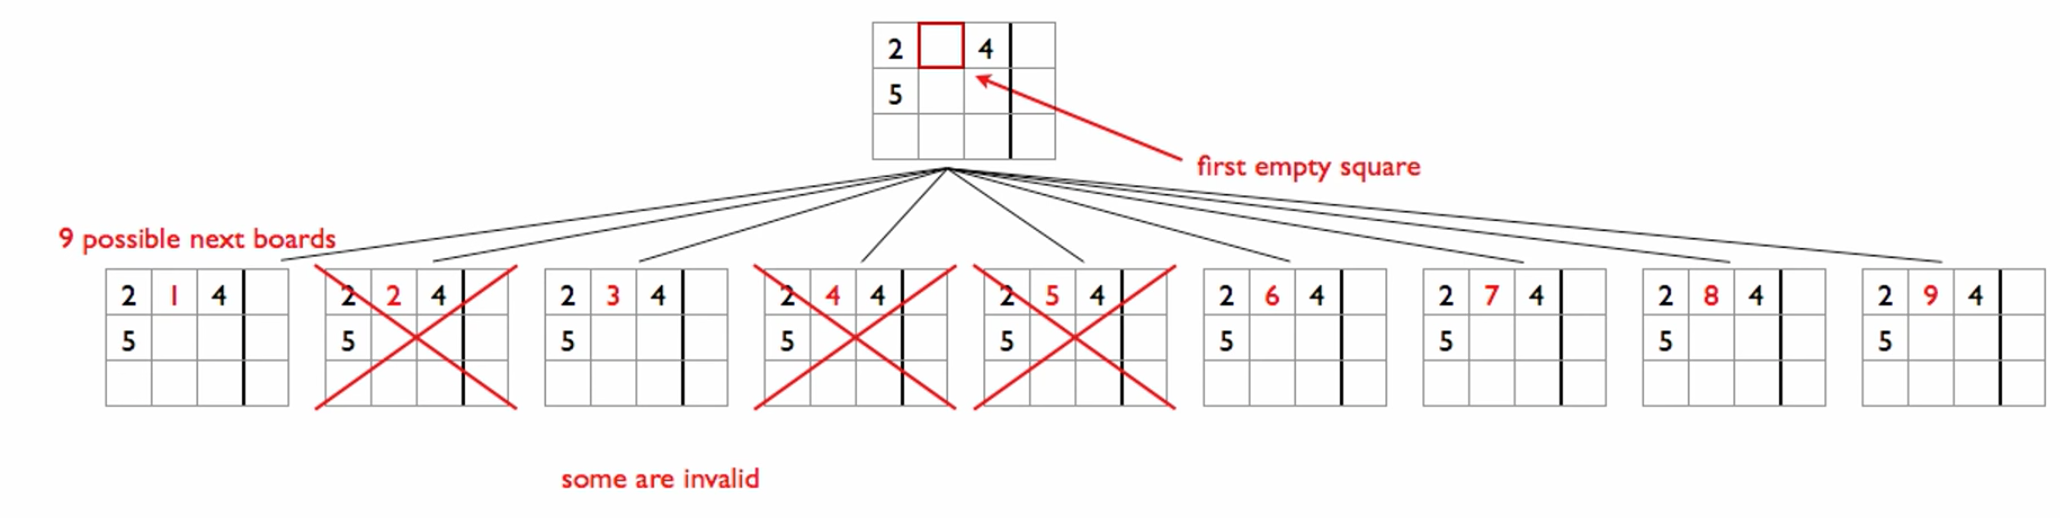

Given a valid starting board, this method of generative recursion will always result in a solved board. However, there is no way to determine in advance which branch will ultimately conclude in the solved board. As a result, when searching the tree, it is necessary to follow many branches to their conclusion before arriving at the solved board. By using backtracking search, we can pursue branches to their conclusion, then "backtrack" up to previous candidates in the event of a dead end, as seen below. 

<table class="image">
<tr>
    <td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Backtracking-no-backjumping.svg/1200px-Backtracking-no-backjumping.svg.png" style="width: 400px;"/>  </td>
    </tr>
</table>


# Put it to the Test
Now the fun part - to test the code! There are countless resources online that provide unsolved Sudoku boards on which to test your solver. The most robust source I found was [this](https://www.kaggle.com/bryanpark/sudoku) one, which includes 1 million unsolved Sudoku boards. Thank you Kyubyong Park of Kaggle!

Running the solver in Spyder on my Macbook, the solver was able to complete the __1 million boards__ in a little over an __hour and a half__, with an average solve time of __.0056 seconds per board__. If you'd like to test the code on you computer, the program is available [here](https://github.com/Sam-Rolfe/Sudoku/blob/master/Sudoku_Solver.py) and the dataset (reformatted for easier analysis) is available [here](https://github.com/Sam-Rolfe/Sudoku/blob/master/Sudoku%20Datasets/10000%20Unsolved%20Boards.txt). 